In [3]:
import collections
import pathlib
# データ処理周り
import numpy as np
import pandas as pd
from IPython.core.display import display
# 可視化ライブラリ
import matplotlib.pyplot as plt
from matplotlib import cm # colormap
import seaborn as sns
%matplotlib inline
# pandasのwarningが邪魔なので
import warnings
warnings.filterwarnings('ignore')
# options
# pd.set_option('display.max_columns', 50)
plt.style.use('ggplot')

import tensorflow as tf
import edward as ed
import tensorflow.contrib.distributions as ds
from edward.models import Normal, MultivariateNormalFullCovariance, MultivariateNormalTriL, PointMass
from edward.util import rbf

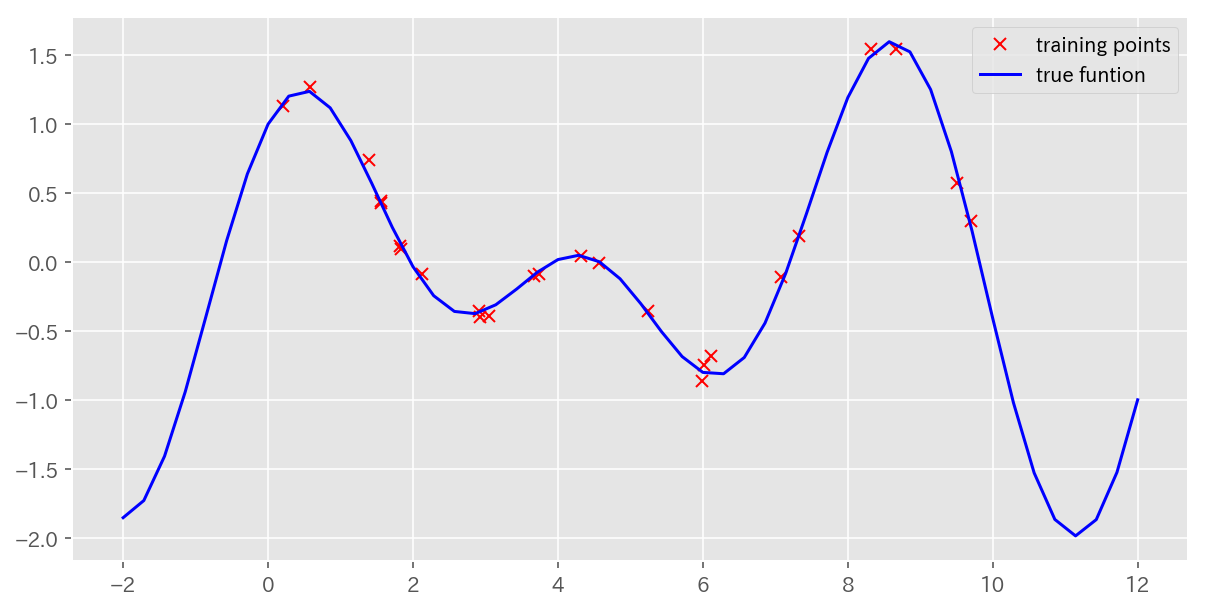

In [7]:
sess = ed.get_session()

# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

reset_graph()
ed.set_seed(42)

def toy_dataset(N, N_pred, eps, extrapolation=2, start=0., stop=10.):
    f = lambda x, eps: np.sin(x) + np.cos(1.4*x) + np.random.normal(scale=eps, size=len(x))
    X = np.sort( np.random.uniform(low=start, high=stop, size=N) )
    X_pred = np.linspace(start-extrapolation, stop+extrapolation, N_pred) 
    return X, X_pred, f(X,eps), f(X_pred,0.)


N, N_pred = 25, 50
eps = 0.05
X, X_pred, Y, Y_pred = toy_dataset(N, N_pred, eps)

fig = plt.figure(figsize=(10,5))
plt.plot(X, Y, 'rx', label='training points')
plt.plot(X_pred, Y_pred, 'blue',label='true funtion')
plt.legend()
plt.show()